<a href="https://colab.research.google.com/github/MikkelKappelPersson/ML-for-ME-Course/blob/main/WS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WS2



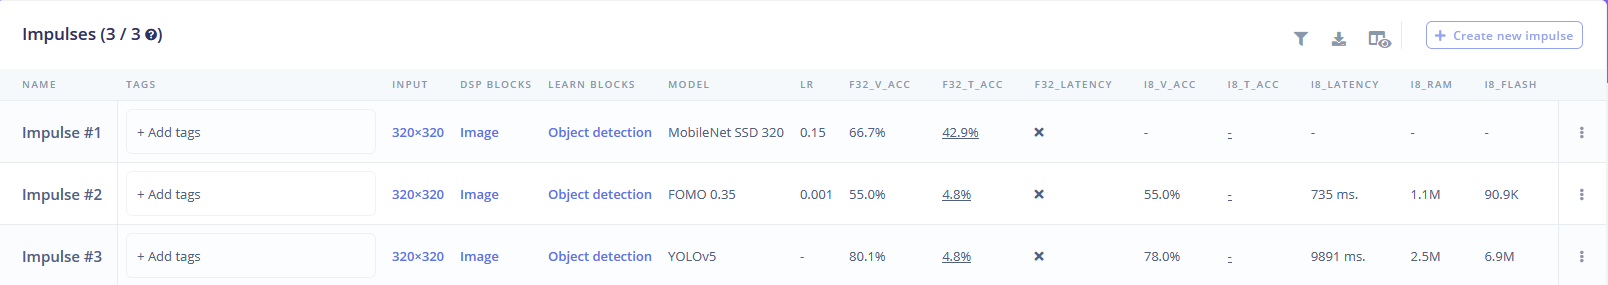

#Initialization and Setup

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont  # Corrected import statement
import os
import shutil
from google.colab import drive
from IPython.display import display

def initialize():
    drive.mount('/content/drive')

    # Paths
    models_folder = "/content/drive/MyDrive/Studie/ML_for_ME/Models"
    images_folder = "/content/drive/MyDrive/Studie/ML_for_ME/Images"
    processed_images_folder = "/content/drive/MyDrive/Studie/ML_for_ME/Processed_Images"

    # Overwrite the Processed_Images folder by deleting it if it exists
    if os.path.exists(processed_images_folder):
        shutil.rmtree(processed_images_folder)  # Delete the folder and its contents
    os.makedirs(processed_images_folder)  # Recreate an empty folder

    # Verify that the models folder exists
    if not os.path.exists(models_folder):
        raise FileNotFoundError(f"Models folder not found: {models_folder}")

    return models_folder, images_folder, processed_images_folder

# Load default PIL font (simplified for now)
font = ImageFont.load_default()  # Use default PIL font

# Define class labels and confidence threshold
class_labels = ["Banana", "Candle", "Cup"]
confidence_threshold = 0.60

# Define colors for each label
label_colors = {
    "Banana": "red",
    "Candle": "blue",
    "Cup": "green"
}

# Initialize paths
models_folder, images_folder, processed_images_folder = initialize()


Mounted at /content/drive


#Common Utility Functions

In [2]:
def preprocess_image(image_path, input_shape):
    """Loads and preprocesses the image."""
    image = Image.open(image_path).convert('RGB')
    image_resized = image.resize((input_shape[1], input_shape[2]))  # Resize image to 320x320
    image_np = np.array(image_resized)

    # Normalize the image
    input_data = image_np.astype(np.float32) / 255.0
    input_data = np.expand_dims(input_data, axis=0)  # Add batch dimension

    return image, input_data

def draw_detections(image, confidence_scores, boxes, classes, class_labels, label_colors, font):
    """Draws bounding boxes and labels on the image."""
    image_width, image_height = image.size
    draw = ImageDraw.Draw(image)

    for i in range(len(confidence_scores)):
        confidence = confidence_scores[i]

        if confidence > confidence_threshold:
            ymin, xmin, ymax, xmax = boxes[i]

            # Scale the normalized box coordinates to the actual image size
            xmin = int(xmin * image_width)
            xmax = int(xmax * image_width)
            ymin = int(ymin * image_height)
            ymax = int(ymax * image_height)

            # Ensure the box coordinates are valid and swap if needed
            xmin, xmax = sorted([xmin, xmax])
            ymin, ymax = sorted([ymin, ymax])

            # Get class label and color
            class_id = int(classes[i])
            class_name = class_labels[class_id] if class_id < len(class_labels) else "Unknown"
            color = label_colors.get(class_name, "red")

            # Draw bounding box
            draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)

            # Create label text
            label = f"{class_name}: {confidence:.2f}"

            # Get text size
            text_bbox = draw.textbbox((xmin, ymin), label, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            # Draw background rectangle and text
            draw.rectangle([xmin, ymin - text_height, xmin + text_width, ymin], fill=color)
            draw.text((xmin, ymin - text_height), label, fill="white", font=font)

def save_and_display_image(image, image_filename, processed_images_folder, model_name):
    """Saves the processed image and displays it."""
    model_output_folder = os.path.join(processed_images_folder, model_name)
    os.makedirs(model_output_folder, exist_ok=True)

    output_path = os.path.join(model_output_folder, image_filename)
    image.save(output_path)
    display(image)  # Display image inline in the notebook
    print(f"Processed and saved {image_filename} with model {model_name}")


#Model 1 (MobileNetV2 SSD) Processing

Model: /content/drive/MyDrive/Studie/ML_for_ME/Models/Model_1.lite
Input Details: [{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall:1', 'index': 334, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 332, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 

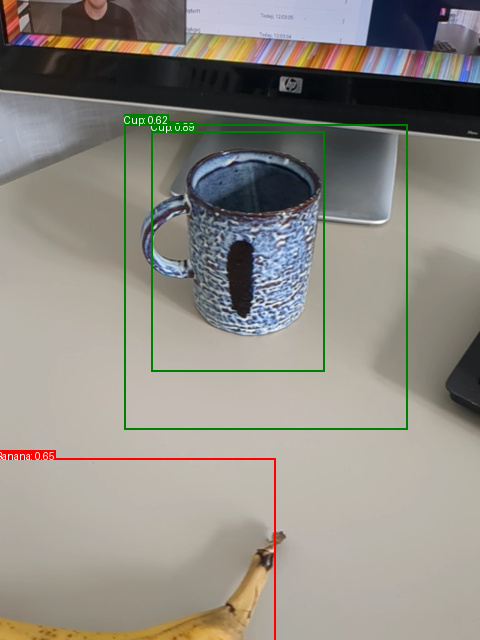

Processed and saved Data.58hb2hbl.jpg with model Model_1
Processing outputs for image: Data.58hb2sjd.jpg
Confidence Scores: [0.9118047  0.89959073 0.5546043  0.5086754  0.49368334 0.4634644
 0.4300479  0.40934566 0.37706792 0.35639736]
Boxes: [[ 0.90726066  0.52493644  1.0461304   0.99491906]
 [ 0.8578034   0.56190205  1.0137      1.0037862 ]
 [ 0.16717197  0.24901572  0.5936182   0.51231396]
 [ 0.23079738 -0.05689418  1.0079769   0.9788121 ]
 [ 0.25745866  0.85540813  0.50058556  1.0225595 ]
 [ 0.18431918  0.17323783  0.54498744  0.6111257 ]
 [ 0.002037    0.5236813   0.12641042  0.7303636 ]
 [ 0.21118736  0.14857677  0.7694787   0.7045871 ]
 [ 0.3005339   0.8245004   0.57420594  1.0404807 ]
 [ 0.22414476  0.4356759   0.79822224  0.97966623]]
Classes: [0. 0. 1. 1. 2. 1. 2. 2. 0. 2.]


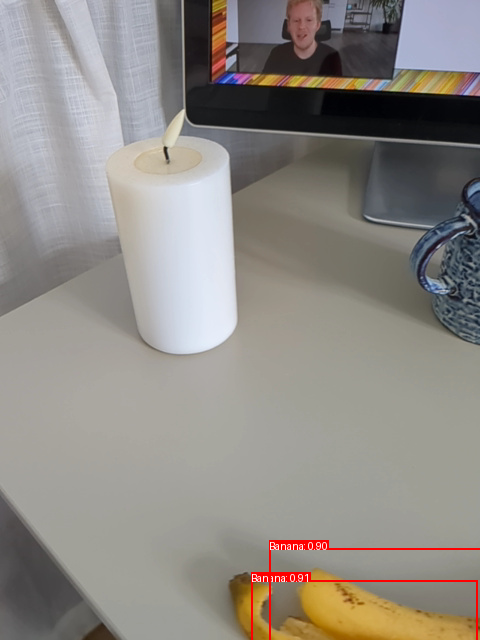

Processed and saved Data.58hb2sjd.jpg with model Model_1
Processing outputs for image: Data.58jb0e47.jpg
Confidence Scores: [0.9027629  0.5620729  0.4823581  0.38743538 0.38236308 0.33680525
 0.3066288  0.25301632 0.24081597 0.20685667]
Boxes: [[0.26121557 0.31800142 0.47751027 0.63318944]
 [0.06633361 0.8071112  0.20360255 1.0389404 ]
 [0.3014807  0.35165316 0.5071363  0.6020692 ]
 [0.8540865  0.29899922 0.95934343 0.44764706]
 [0.29408127 0.45466977 0.42494398 0.5852161 ]
 [0.1909282  0.27668965 0.52860373 0.7224505 ]
 [0.26979238 0.41912708 0.44596785 0.58098245]
 [0.00937459 0.35441744 0.30693296 0.93694746]
 [0.01724402 0.83059484 0.10975421 1.0244375 ]
 [0.1153477  0.15521076 0.57018    0.7700194 ]]
Classes: [2. 0. 2. 1. 2. 2. 2. 2. 0. 2.]


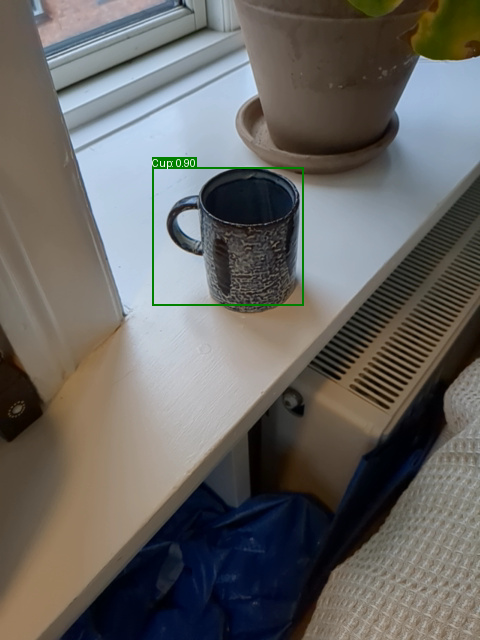

Processed and saved Data.58jb0e47.jpg with model Model_1
Processing outputs for image: Data.58hb2mcd.jpg
Confidence Scores: [0.9213356  0.7260127  0.7206218  0.6642995  0.6524625  0.35746148
 0.34321657 0.24628422 0.2449216  0.22841853]
Boxes: [[ 0.5045442   0.34304285  0.6867898   0.8085649 ]
 [ 0.2730595   0.54255235  0.46867412  0.75865126]
 [ 0.27209207  0.18143937  0.47626975  0.3766552 ]
 [ 0.49034962  0.4328612   0.6664961   0.7599127 ]
 [ 0.28896153  0.55135256  0.41945064  0.71842283]
 [ 0.25605553  0.10559045  0.50735664  0.3784942 ]
 [ 0.28991815  0.20781165  0.433242    0.3456791 ]
 [ 0.25906676  0.5852653   0.5242786   0.7376429 ]
 [-0.0450955   0.2513873   0.4353979   1.085145  ]
 [ 0.71013486  0.28511715  0.931141    0.6491102 ]]
Classes: [0. 2. 2. 0. 2. 1. 1. 2. 2. 1.]


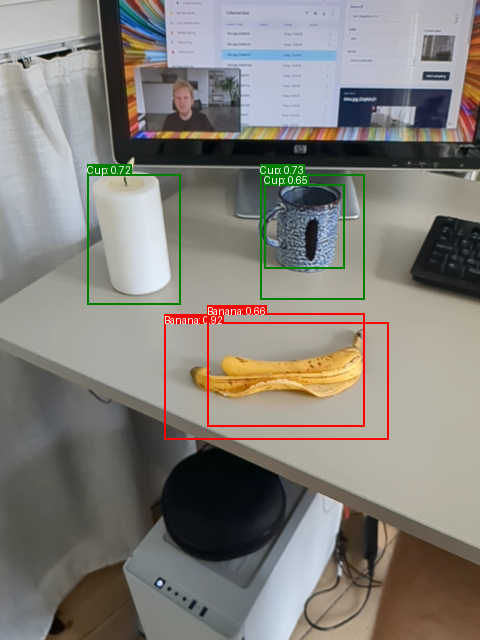

Processed and saved Data.58hb2mcd.jpg with model Model_1


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Studie/ML_for_ME/Images/.ipynb_checkpoints'

In [3]:
def process_model_1():
    model_path = os.path.join(models_folder, "Model_1.lite")
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Check input and output details for debugging
    print(f"Model: {model_path}")
    print(f"Input Details: {input_details}")
    print(f"Output Details: {output_details}")

    for image_filename in os.listdir(images_folder):
        image_path = os.path.join(images_folder, image_filename)

        # Preprocess image
        image, input_data = preprocess_image(image_path, input_details[0]['shape'])

        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        # Process outputs
        confidence_scores = interpreter.get_tensor(output_details[0]['index'])[0]  # Confidence scores
        boxes = interpreter.get_tensor(output_details[1]['index'])[0]  # Bounding box coordinates
        classes = interpreter.get_tensor(output_details[3]['index'])[0]  # Class labels

        # Debugging outputs
        print(f"Processing outputs for image: {image_filename}")
        print(f"Confidence Scores: {confidence_scores}")
        print(f"Boxes: {boxes}")
        print(f"Classes: {classes}")

        # Draw detections and save the image
        if len(confidence_scores) > 0:
            draw_detections(image, confidence_scores, boxes, classes, class_labels, label_colors, font)
            save_and_display_image(image, image_filename, processed_images_folder, "Model_1")
        else:
            print(f"No detections found for {image_filename}")

process_model_1()


#Model 2 (FOMO) Processing

In [ ]:
def convert_segmentation_map_to_object_detection_prediction(grid, threshold=0.8):
    """Converts segmentation map to bounding boxes.
    Args:
        grid: (H, W, C) array with class probabilities for each grid cell.
        threshold: Minimum confidence threshold to consider a cell as containing an object.
    Returns:
        List of bounding boxes (xmin, ymin, xmax, ymax) and associated class labels.
    """
    height, width, num_classes = grid.shape
    bboxes = []

    # Loop through each grid cell and check if confidence exceeds the threshold
    for i in range(height):
        for j in range(width):
            class_probabilities = grid[i, j]
            class_id = np.argmax(class_probabilities)  # Get the predicted class
            object_confidence = class_probabilities[class_id]  # Confidence of the predicted class

            # Skip the cell if the predicted class is "None" (class 0) or confidence is below threshold
            if class_id == 0 or object_confidence < threshold:
                continue  # Skip cells with "None" class or low confidence

            # Convert grid cell indices into a bounding box (e.g., scale to image size)
            xmin, ymin = j / width, i / height
            xmax, ymax = (j + 1) / width, (i + 1) / height

            # Append the detection (bounding box and class)
            bboxes.append((xmin, ymin, xmax, ymax, class_id, object_confidence))

    return bboxes


def process_fomo_outputs(output, threshold=0.8):
    """Process FOMO outputs and convert them into bounding boxes."""
    height, width, num_classes = output.shape[1:4]
    print(f"Processing FOMO Model with output shape ({height}, {width}, {num_classes})")

    # Get raw predictions from the model output
    raw_predictions = output[0]  # Assuming batch size of 1

    # Convert the segmentation map into bounding boxes
    bboxes = convert_segmentation_map_to_object_detection_prediction(raw_predictions, threshold)

    return bboxes

def process_model_2():
    """Processes the outputs from the FOMO model (Model_2)."""

    class_labels = ["None", "Banana", "Candle", "Cup"]

    interpreter, input_details, output_details = load_model(model_2_path)

    for image_filename in os.listdir(images_folder):
        image_path = os.path.join(images_folder, image_filename)

        try:
            image, input_data = preprocess_image(image_path, input_details[0]['shape'])
            run_inference(interpreter, input_data, input_details)
            output_data = interpreter.get_tensor(output_details[0]['index'])

            # Process FOMO outputs (convert segmentation map to bounding boxes)
            bboxes = process_fomo_outputs(output_data, threshold=0.5)

            if bboxes:
                draw_detections(image, bboxes, class_labels, label_colors, font)
                save_and_display_image(image, image_filename, processed_images_folder, model_name="Model_2")
            else:
                print(f"No detections for {image_filename}")

        except Exception as e:
            print(f"Error processing {image_filename}: {e}")

def draw_detections(image, bboxes, class_labels, label_colors, font):
    """Draws bounding boxes and labels on the image."""
    image_width, image_height = image.size
    draw = ImageDraw.Draw(image)

    for (xmin, ymin, xmax, ymax, class_id, confidence) in bboxes:
        class_name = class_labels[class_id] if class_id < len(class_labels) else "Unknown"
        color = label_colors.get(class_name, "red")

        # Scale bounding box coordinates to image size
        xmin, ymin, xmax, ymax = int(xmin * image_width), int(ymin * image_height), int(xmax * image_width), int(ymax * image_height)

        # Draw bounding box
        draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)

        # Draw label
        label = f"{class_name}: {confidence:.2f}"
        text_bbox = draw.textbbox((xmin, ymin), label, font=font)
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        draw.rectangle([xmin, ymin - text_height, xmin + text_width, ymin], fill=color)
        draw.text((xmin, ymin - text_height), label, fill="white", font=font)

process_model_2()



#Model 3 (YOLOv5) Processing

In [ ]:
model_3_path = "/content/drive/MyDrive/Studie/ML_for_ME/Models/Model_3.lite"

def process_yolov5_outputs(output, threshold=0.5):
    """Process YOLOv5 model outputs and convert them into bounding boxes."""
    num_boxes = output.shape[1]  # This is typically the second dimension
    bboxes = []

    for i in range(num_boxes):
        # Extract the values for this box
        x_center, y_center, width, height, object_confidence, *class_confidences = output[0, i]

        # Calculate the actual confidence by multiplying objectness and class confidence
        class_id = np.argmax(class_confidences)  # Get the class with the highest confidence
        confidence = class_confidences[class_id] * object_confidence  # Multiply with objectness confidence

        # Filter out weak detections based on threshold
        if confidence > threshold:
            # Convert YOLOv5 bounding box format (center_x, center_y, width, height) to (xmin, ymin, xmax, ymax)
            xmin = x_center - (width / 2)
            ymin = y_center - (height / 2)
            xmax = x_center + (width / 2)
            ymax = y_center + (height / 2)

            # Append the detection (bounding box and class)
            bboxes.append((xmin, ymin, xmax, ymax, class_id, confidence))

    return bboxes

def process_model_3():
    """Processes the outputs from the YOLOv5 model (Model_3)."""
    interpreter, input_details, output_details = load_model(model_3_path)

    for image_filename in os.listdir(images_folder):
        image_path = os.path.join(images_folder, image_filename)

        try:
            # Preprocess the image and run inference
            image, input_data = preprocess_image(image_path, input_details[0]['shape'])
            run_inference(interpreter, input_data, input_details)
            output_data = interpreter.get_tensor(output_details[0]['index'])

            # Process YOLOv5 outputs (convert bounding boxes)
            bboxes = process_yolov5_outputs(output_data, threshold=0.5)

            if bboxes:
                draw_detections(image, bboxes, class_labels, label_colors, font)
                save_and_display_image(image, image_filename, processed_images_folder, model_name="Model_3")
            else:
                print(f"No detections for {image_filename}")

        except Exception as e:
            print(f"Error processing {image_filename}: {e}")

def draw_detections(image, bboxes, class_labels, label_colors, font):
    """Draws bounding boxes and labels on the image."""
    image_width, image_height = image.size
    draw = ImageDraw.Draw(image)

    for (xmin, ymin, xmax, ymax, class_id, confidence) in bboxes:
        class_name = class_labels[class_id] if class_id < len(class_labels) else "Unknown"
        color = label_colors.get(class_name, "red")

        # Scale bounding box coordinates to image size
        xmin, ymin, xmax, ymax = int(xmin * image_width), int(ymin * image_height), int(xmax * image_width), int(ymax * image_height)

        # Draw bounding box
        draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)

        # Draw label
        label = f"{class_name}: {confidence:.2f}"
        text_bbox = draw.textbbox((xmin, ymin), label, font=font)
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        draw.rectangle([xmin, ymin - text_height, xmin + text_width, ymin], fill=color)
        draw.text((xmin, ymin - text_height), label, fill="white", font=font)

# Process Model 3 (YOLOv5)
process_model_3()
